In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [5]:

df = pd.read_excel(r"C:\Users\venka\Downloads\HealthCareData.xlsx")
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [6]:
df.shape

(950, 42)

In [7]:
df.isnull()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [9]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [10]:
df.isnull().sum() 

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [11]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns


<ipython-input-11-00cfcd42d887>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

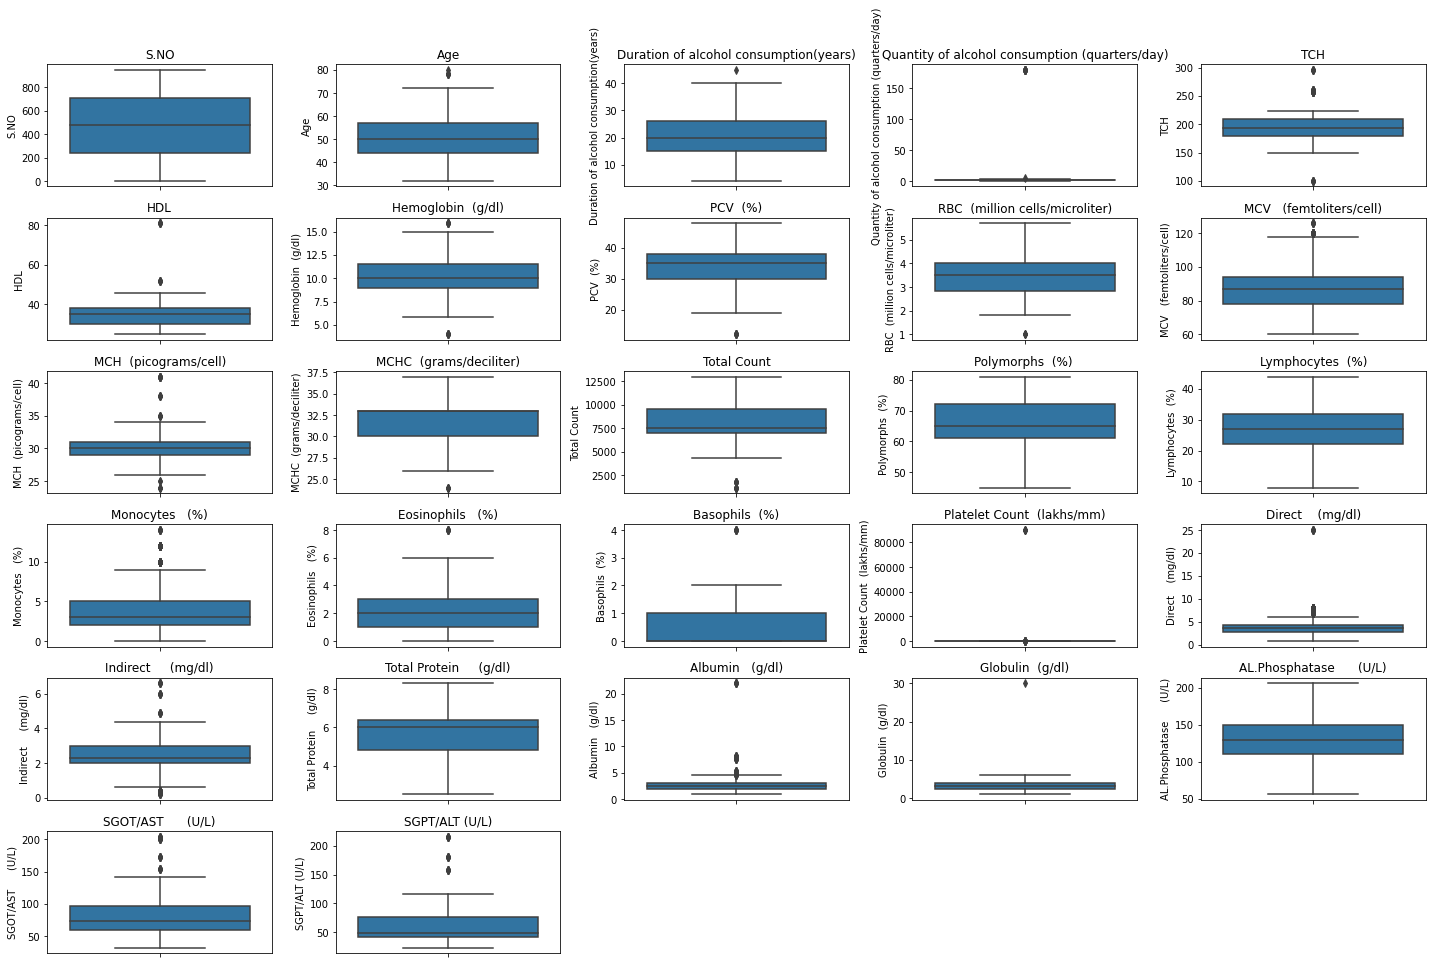

In [12]:
c = 0
plt.figure(figsize=(20, 15))
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        plt.subplot(7, 5, c + 1)
        sns.boxplot(y=df[i])      
        plt.title(i)
        c += 1
plt.tight_layout()
plt.show()

['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL', 'Hemoglobin (g/dl)', 'PCV (%)', 'RBC (million cells/microliter)', 'MCV (femtoliters/cell)', 'MCH (picograms/cell)', 'MCHC (grams/deciliter)', 'Total Count', 'Polymorphs (%)', 'Lymphocytes (%)', 'Monocytes (%)', 'Eosinophils (%)', 'Basophils (%)', 'Platelet Count (lakhs/mm)', 'Total Bilirubin (mg/dl)', 'Direct (mg/dl)', 'Indirect (mg/dl)', 'Total Protein (g/dl)', 'Albumin (g/dl)', 'Globulin (g/dl)', 'A/G Ratio', 'AL.Phosphatase (U/L)', 'SGOT/AST (U/L)', 'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or not)', 'Predicted Value(Out Come-Patient suffering from liver cirrosis or not)']


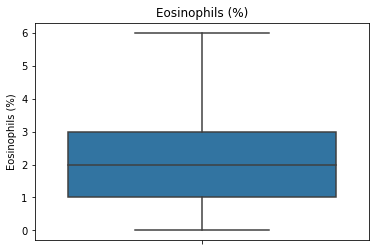

In [13]:
df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)
print(df.columns.tolist())
col = 'Eosinophils (%)'

q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df[col] = np.where(
    df[col] > upper_limit, upper_limit,
    np.where(df[col] < lower_limit, lower_limit, df[col])
)
sns.boxplot(y=df[col])
plt.title(col)
plt.show()

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Basophils (%)'>

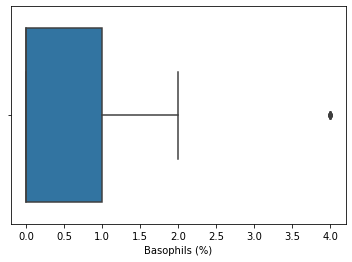

In [14]:
sns.boxplot(df['Basophils (%)'])


In [15]:
# Calculate Q1 and Q3
q1 = df['Basophils (%)'].quantile(0.25)
q3 = df['Basophils (%)'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine limits for outliers
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Replace outliers with boundary values
df['Basophils (%)'] = np.where(
    df['Basophils (%)'] > upper_limit, upper_limit,
    np.where(df['Basophils (%)'] < lower_limit, lower_limit, df['Basophils (%)'])
)


C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Basophils (%)'>

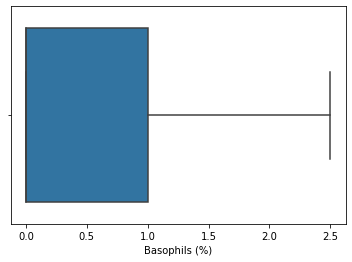

In [16]:
sns.boxplot(df['Basophils (%)'])


<AxesSubplot:xlabel='Platelet Count (lakhs/mm)'>

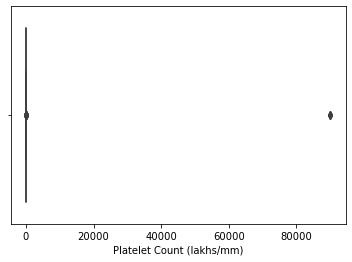

In [17]:
sns.boxplot(x='Platelet Count (lakhs/mm)', data=df)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop('Predicted Value(Out Come-Patient suffering from liver cirrosis or not)', axis=1)
y = df['Predicted Value(Out Come-Patient suffering from liver cirrosis or not)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937,72,female,urban,4,3,branded liquor,negative,negative,NO,...,1.0,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no
290,291,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
544,545,38,male,urban,24,3,both,negative,negative,NO,...,2.0,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES
275,276,60,female,rural,10,3,both,negative,negative,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
109,110,50,male,rural,15,1,country liquor,negative,negative,YES,...,6.0,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,negative,negative,YES,...,7.9,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES
270,271,60,female,rural,10,3,both,Positive,Positive,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
860,861,57,male,rural,25,3,both,Positive,Positive,YES,...,3.7,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES
435,436,55,female,rural,20,2,country liquor,Positive,Positive,YES,...,2.5,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES


In [21]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
199,200,44,male,NaN,25,3,both,Positive,Positive,YES,...,2.5,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES
929,930,50,male,NaN,20,3,both,negative,negative,NO,...,1.2,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no
693,694,42,male,NaN,22,3,both,Positive,Positive,YES,...,3.0,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES
798,799,51,male,rural,25,2,country liquor,negative,negative,YES,...,25.0,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES
874,875,38,male,rural,10,3,both,Positive,Positive,YES,...,3.2,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,Positive,Positive,NO,...,2.2,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES
33,34,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
31,32,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
710,711,46,male,rural,18,2,country liquor,negative,negative,YES,...,1.1,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES


In [22]:
y_train

936     no
290    YES
544    YES
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    NaN
Name: Predicted Value(Out Come-Patient suffering from liver cirrosis or not), Length: 760, dtype: object

In [23]:
y_test

199    YES
929    YES
693    YES
798    YES
874    YES
      ... 
598    YES
33     YES
31     YES
710    YES
298    YES
Name: Predicted Value(Out Come-Patient suffering from liver cirrosis or not), Length: 190, dtype: object

In [24]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.481909,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.644771,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,2.500000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


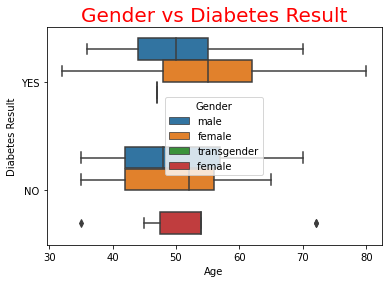

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Age', y='Diabetes Result', data=df, hue='Gender')
plt.title('Gender vs Diabetes Result', color='red', size=20)
plt.show()


<AxesSubplot:xlabel='Place(location where the patient lives)', ylabel='Age'>

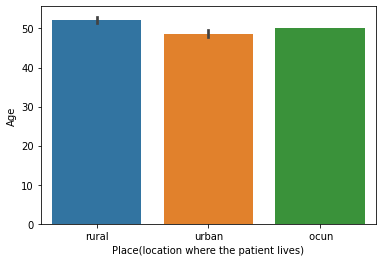

In [26]:
sns.barplot(x=df['Place(location where the patient lives)'], y=df['Age'])

Text(0.5, 1.0, 'Place vs Age')

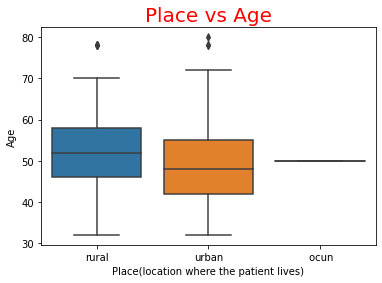

In [27]:
sns.boxplot(x='Place(location where the patient lives)', y='Age', data=df)
plt.title('Place vs Age', color='red', size=20)


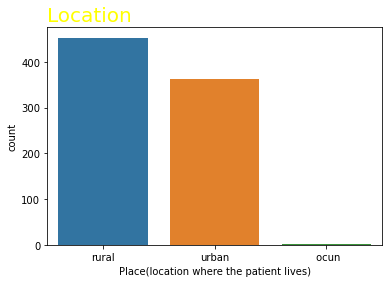

In [28]:
sns.countplot(data=df, x='Place(location where the patient lives)')
plt.title('Location', color='yellow', size=20, loc='left')
plt.show()


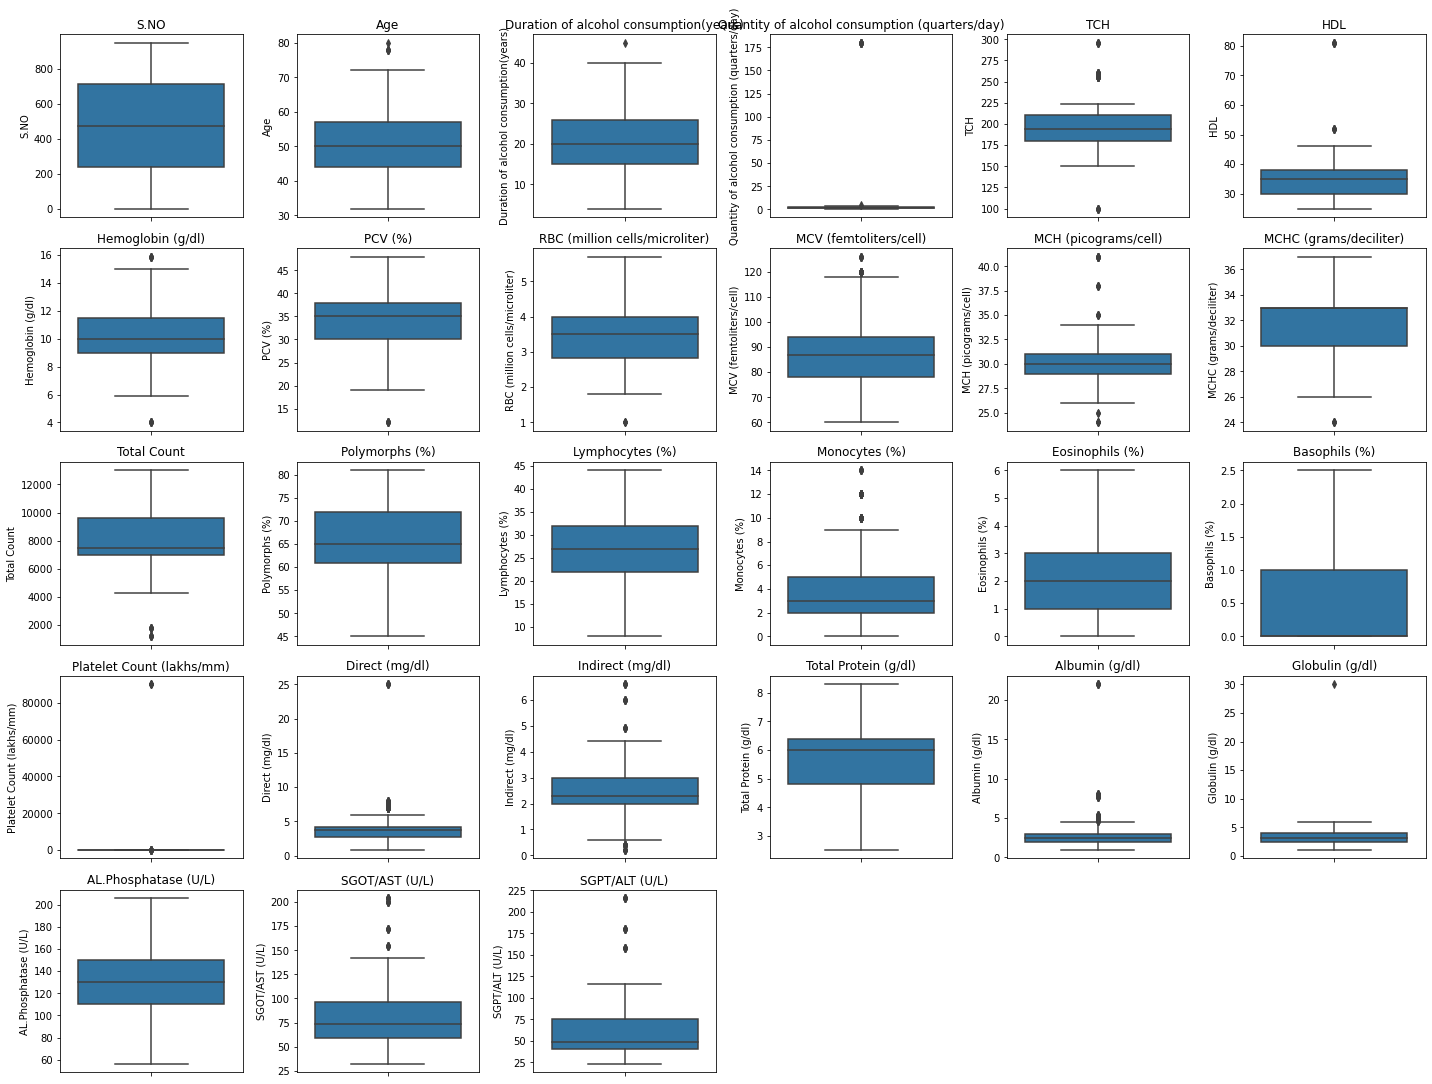

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 6, i) 
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()


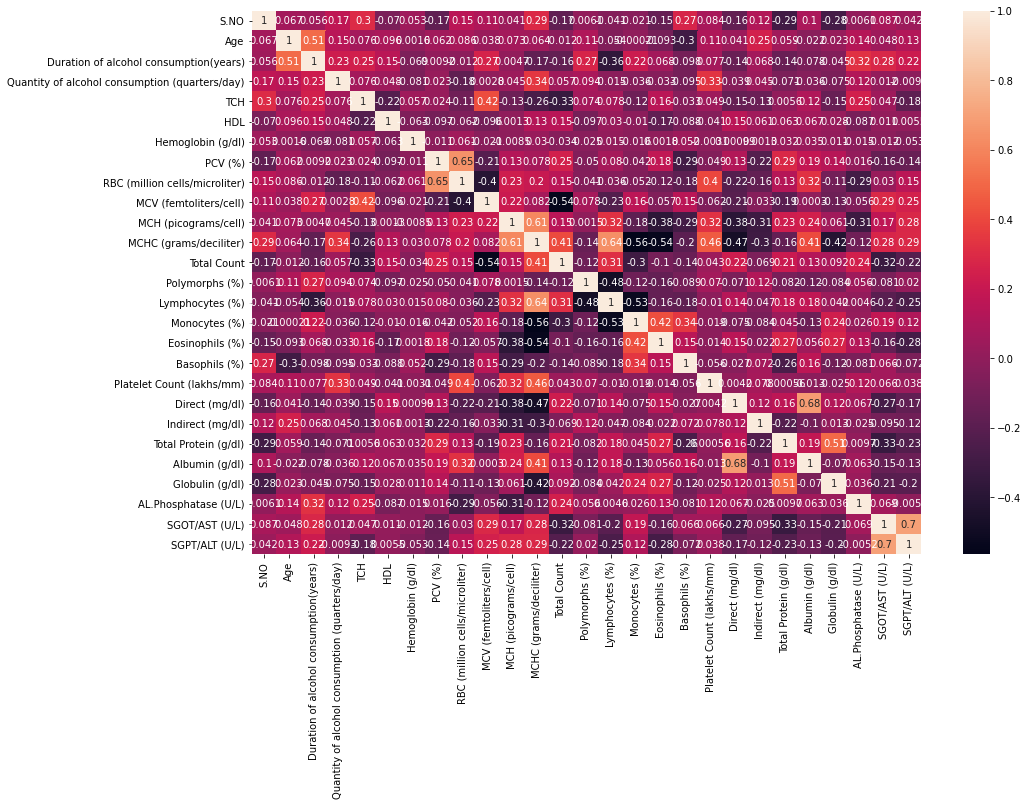

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937,72,female,urban,4,3,branded liquor,negative,negative,NO,...,1.0,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no
290,291,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
544,545,38,male,urban,24,3,both,negative,negative,NO,...,2.0,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES
275,276,60,female,rural,10,3,both,negative,negative,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
109,110,50,male,rural,15,1,country liquor,negative,negative,YES,...,6.0,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,negative,negative,YES,...,7.9,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES
270,271,60,female,rural,10,3,both,Positive,Positive,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
860,861,57,male,rural,25,3,both,Positive,Positive,YES,...,3.7,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES
435,436,55,female,rural,20,2,country liquor,Positive,Positive,YES,...,2.5,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES


In [34]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
199,200,44,male,NaN,25,3,both,Positive,Positive,YES,...,2.5,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES
929,930,50,male,NaN,20,3,both,negative,negative,NO,...,1.2,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no
693,694,42,male,NaN,22,3,both,Positive,Positive,YES,...,3.0,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES
798,799,51,male,rural,25,2,country liquor,negative,negative,YES,...,25.0,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES
874,875,38,male,rural,10,3,both,Positive,Positive,YES,...,3.2,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,Positive,Positive,NO,...,2.2,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES
33,34,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
31,32,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
710,711,46,male,rural,18,2,country liquor,negative,negative,YES,...,1.1,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES


In [35]:
y_train

936     no
290    YES
544    YES
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    NaN
Name: Predicted Value(Out Come-Patient suffering from liver cirrosis or not), Length: 760, dtype: object

In [36]:
y_test

199    YES
929    YES
693    YES
798    YES
874    YES
      ... 
598    YES
33     YES
31     YES
710    YES
298    YES
Name: Predicted Value(Out Come-Patient suffering from liver cirrosis or not), Length: 190, dtype: object

In [37]:
print(x_train.dtypes)


S.NO                                                int64
Age                                                 int64
Gender                                             object
Place(location where the patient lives)            object
Duration of alcohol consumption(years)              int64
Quantity of alcohol consumption (quarters/day)      int64
Type of alcohol consumed                           object
Hepatitis B infection                              object
Hepatitis C infection                              object
Diabetes Result                                    object
Blood pressure (mmhg)                              object
Obesity                                            object
Family history of cirrhosis/ hereditary            object
TCH                                               float64
TG                                                 object
LDL                                                object
HDL                                               float64
Hemoglobin (g/

In [41]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed']
le = LabelEncoder()
for col in label_cols:
    x_train.loc[:, col] = le.fit_transform(x_train[col].astype(str).str.strip())

In [42]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')


In [43]:
x_train = x_train.fillna(x_train.mean())  


In [49]:
print(x_train.isna().sum()[x_train.isna().sum() > 0])

Hepatitis B infection                      760
Hepatitis C infection                      760
Diabetes Result                            760
Blood pressure (mmhg)                      760
Obesity                                    760
Family history of cirrhosis/ hereditary    760
USG Abdomen (diffuse liver or not)         760
dtype: int64


In [50]:
x_train = x_train.fillna(0)

In [52]:
x_train['__target__'] = y_train
x_train.dropna(inplace=True)

# Split back the features and target
y_train = x_train['__target__']
x_train = x_train.drop(columns='__target__')

In [53]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]


In [54]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

x_train = x_train.copy()
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    x_train[col] = le.fit_transform(x_train[col].astype(str).str.strip())
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train = x_train.fillna(x_train.mean(numeric_only=True))
x_train = x_train.clip(-1e10, 1e10)
x_train = x_train.astype(float)
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

if y_train.dtype == object or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train.astype(str))

y_train = pd.Series(y_train)
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train = y_train.fillna(y_train.mode()[0])
y_train = y_train.astype(int)
assert not np.isnan(x_train.values).any(), 
assert not np.isinf(x_train.values).any(), 
assert not np.isnan(y_train.values).any(), 
assert not np.isinf(y_train.values).any(), 

nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [56]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.0,6.0,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.0,7.0,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
77,78.0,40.0,1.0,2.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.9,5.0,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
435,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,2.5,1.5,5.0,2.5,2.5,0.896233,152.0,172.0,180.0,0.0


In [57]:
y_train

290    0
544    0
275    0
109    0
77     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: __target__, Length: 608, dtype: int32

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [60]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.0,6.0,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.0,7.0,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
77,78.0,40.0,1.0,2.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.9,5.0,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
435,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,2.5,1.5,5.0,2.5,2.5,0.896233,152.0,172.0,180.0,0.0


In [61]:
y_train

290    0
544    0
275    0
109    0
77     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: __target__, Length: 608, dtype: int32

In [81]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
logistic = log.fit(x_train, y_train)


C:\Users\venka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.0,6.0,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.0,7.0,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
77,78.0,40.0,1.0,2.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.0,6.0,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.9,5.0,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.8,6.4,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
435,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,2.5,1.5,5.0,2.5,2.5,0.896233,152.0,172.0,180.0,0.0


In [83]:
y_train

290    0
544    0
275    0
109    0
77     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: __target__, Length: 608, dtype: int32

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [105]:
print("x_Train", x_train)
print("y_Train", y_train)


x_Train       S.NO   Age  Gender  Place(location where the patient lives)  \
290  291.0  52.0     1.0                                      3.0   
544  545.0  38.0     1.0                                      3.0   
275  276.0  60.0     0.0                                      2.0   
109  110.0  50.0     1.0                                      2.0   
77    78.0  40.0     1.0                                      2.0   
..     ...   ...     ...                                      ...   
71    72.0  40.0     1.0                                      3.0   
106  107.0  54.0     1.0                                      2.0   
270  271.0  60.0     0.0                                      2.0   
435  436.0  55.0     0.0                                      2.0   
102  103.0  52.0     1.0                                      2.0   

     Duration of alcohol consumption(years)  \
290                                    12.0   
544                                    24.0   
275                   

In [97]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [98]:
k = np.random.randint(1, 50, 60)

In [99]:
params = {'n_neighbors' : k}

In [100]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([47,  3, 17,  3,  9,  3, 24, 26, 23, 35, 22, 20, 24, 44,  4, 25, 11,
       34, 46, 48, 28,  2, 42, 21, 32, 21,  2, 26, 10, 33,  6, 47, 17,  5,
       32, 22, 35,  3, 34, 33, 34, 31, 31, 37, 23,  2, 12, 19, 35, 47,  7,
       47, 14, 13, 26, 18, 48, 14, 45,  5])})

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

if y.dtype == object or y.dtype.name == 'category':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))

x = x.copy()
for col in x.select_dtypes(include=['object', 'category']).columns:
    x[col] = x[col].astype(str).str.strip()
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(x.mean(numeric_only=True), inplace=True)

assert not np.isnan(x.values).any()
assert not np.isinf(x.values).any()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k = np.random.randint(1, 50, 60)
params = {'n_neighbors': k}

random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=params,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    verbose=0
)

random_search.fit(x_train, y_train)

print('train_score -', random_search.score(x_train, y_train))
print('test_score  -', random_search.score(x_test, y_test))




train_score - 0.9421052631578948
test_score  - 0.9473684210526315
